<a href="https://colab.research.google.com/github/korean2803/data/blob/master/knn%20%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


%matplotlib inline
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/파이썬/data/csv/basketball_stat.csv')

In [63]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [64]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

Text(0.5, 1.0, 'STL')

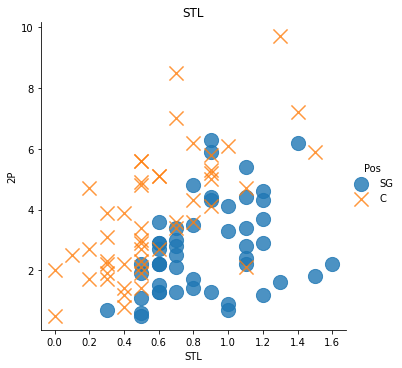

In [65]:
sns.lmplot('STL','2P', data=df, fit_reg=False,
           scatter_kws={"s": 200},
           markers=["o","x"],
           hue="Pos")
plt.title('STL')

Text(0.5, 1.0, 'STL')

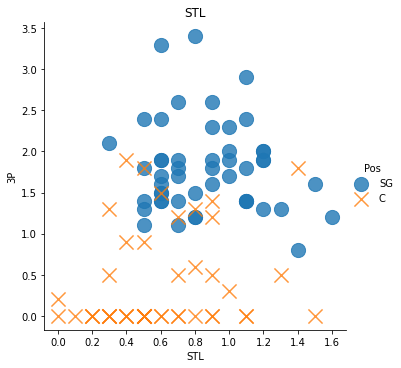

In [66]:
sns.lmplot('STL','3P', data=df, fit_reg=False,
           scatter_kws={"s": 200},
           markers=["o","x"],
           hue="Pos")
plt.title('STL')

In [0]:
df.drop(['2P','AST','STL'],axis=1, inplace = True)

In [68]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [0]:
train, test = train_test_split(df,test_size=0.2)

In [70]:
train.shape[0]

80

In [71]:
test.shape[0]

20

In [77]:
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3,max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,
                             scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.925,
 0.9,
 0.9,
 0.9125,
 0.9125,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.875,
 0.875,
 0.85,
 0.825,
 0.8,
 0.7875,
 0.7875,
 0.7875,
 0.75,
 0.7625]

<function matplotlib.pyplot.show>

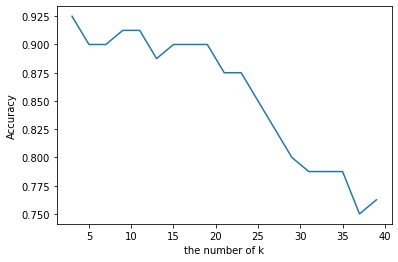

In [78]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show

In [79]:
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print("The best number of k:" + str(k))

The best number of k:3


In [92]:
knn = KNeighborsClassifier(n_neighbors=3)

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]
knn.fit(x_train, y_train.values.ravel())
x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]
pred = knn.predict(x_test)
print("accuracy:" + str( accuracy_score(y_test.values.ravel(), pred)))

accuracy:0.85


In [93]:
y_test.values.ravel()

array(['SG', 'SG', 'SG', 'C', 'SG', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'SG'], dtype=object)